# Comparison of the Covid-19 data provided by different organizations

In this document we want to compare the data for daily confirmed infections and deaths of the  
following three organizations. As one of the sources, the ECDC, stopped providing daily numbers  
we compare the data between 1.1.2020 and 14.12.2020.

1. World Health Organization (WHO)

> The WHO publishes the data on a dashboard available under https://covid19.who.int/table. As it is an  
official source we expect the data to be pretty clean and up-to-date. The data can be downloaded here:  
https://covid19.who.int/WHO-COVID-19-global-data.csv

2. European Centre for Disease Prevention and Control (ECDC)

> As the ECDC is an organization of the European Union we can also expect clean and actual data. The data  
can be downloaded here:  
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide.  
Since 14.12.2020 they publish only weekly numbers.  

3. Our World in Data (OWID)

> According to the OWID website (https://github.com/owid/covid-19-data/tree/master/public/data) the  
Covid-19 data provided is coming from the *COVID-19 Data Repository by the Center for Systems Science  
and Engineering (CSSE) at Johns Hopkins University* (JHU, https://github.com/CSSEGISandData/COVID-19).  
The data can be downloaded here: https://covid.ourworldindata.org/data/owid-covid-data.csv

## Some general remarks

The WHO data covers most of the countries of the world. even the smallest island in the south east  
pacific is covered. Unfortunately Taiwan is not covered in the WHO data. Instead Taiwan's numbers  
are included in those of China.



## Loading the data

In a first step we need to define the dependencies and create instances of the classes to handle  
the data of the different sources. The references to the classes are combined in a list containing  
all of them.    


In [1]:
import datetime
from datetime import date
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import time
import datetime
from CovidCases import CovidCases
from CovidCasesECDC import CovidCasesECDC
from CovidCasesOWID import CovidCasesOWID
from CovidCasesWHOv1 import CovidCasesWHOv1
from CovidCasesWHO import CovidCasesWHO
from PlotterBuilder import PlotterBuilder

# the path to our data files
path = '/Users/cmbt/Documents/GitHub/Covid-19-analysis/data'

# the OWID data up to 14.12.2020
filename = path + '/2020-12-14-OWID.csv'
covidCases_owid = CovidCasesOWID(filename)

# the ECDC data up to 14.12.2020
filename = path + '/2020-12-14-ECDC.csv'
covidCases_ecdc = CovidCasesECDC(filename)

# the WHO data up to 14.12.2020
filename = path + '/2020-12-14-WHO.csv'
covidCases_who = CovidCasesWHO(filename)

# combine them in a list
objList = [covidCases_owid, covidCases_ecdc, covidCases_who]


/Users/cmbt/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Pandas loading the OWID CSV: 1.0109367370605469s
Pandas loading the ECDC CSV: 0.9080450534820557s
Pandas loading the WHO CSV: 1.4129951000213623s



In a next step we need a function that is loading data from the data files to combine them  
in a single dataframe.


In [2]:
def create_combined_dataframe(objList, countryList, lastNdays=0, sinceNcases=0):  
    # a final array of dataframes containing all three data
    dfs = []
    # loop through all classes / geoIDs
    for obj in objList:
        # get the data frame
        df = obj.get_data_by_geoid_string_list(countryList, lastNdays, sinceNcases)
        # rename the country and add the source info to the name
        for name in df['GeoName'].unique():
            df.replace(name, name + '-' + obj.get_data_source_info()[1], inplace=True)
        # lowpass the DailyCases attribute
        width = 7
        df = obj.add_lowpass_filter_for_attribute(df, 'DailyCases', width)
        # add it to the list
        dfs.append(df)  
    # finally concatenate all dfs together
    df = pd.concat(dfs)  
    # ...and return it
    return df



# Plot the data

Finally we need a method to generate some plots.


In [3]:
def plot_the_data (df):
    # the name of the attribute we want to plot
    attribute = 'DailyCases'
    # plot
    (PlotterBuilder(attribute)
        .set_title(attribute)
        #.set_log()
        .set_grid()
        .plot_dataFrame(df))

    # the name of the attribute we want to plot
    attribute = "DailyCases7"
    # plot
    (PlotterBuilder(attribute)
        .set_title(attribute)
        #.set_log()
        .set_grid()
        .plot_dataFrame(df))

    # the name of the attribute we want to plot
    attribute = 'Cases'
    # plot
    (PlotterBuilder(attribute)
        .set_title(attribute)
        #.set_log()
        .set_grid()
        .plot_dataFrame(df))



# Putting it all together

## France and Spain

Now put everything together and generate some first plots. We will notice, that the daily OWID data for  
Spain and France is very noisy. Obviously this is not only the *weekend* effect. There are also many  
corrections in the OWID data. Even by applying a rolling 7-day average we can still see a stronger  
noise on the OWID data.  
On the other hand the ECDC data is not visible at all as it's obviously covered by the WHO line. For  
France we can also see, that the accumulated OWID data is slightly higher compared to the ECDC  
and WHO.  


/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: invalid value encountered in double_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: invalid value encountered in long_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: divide by zero encountered in long_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])


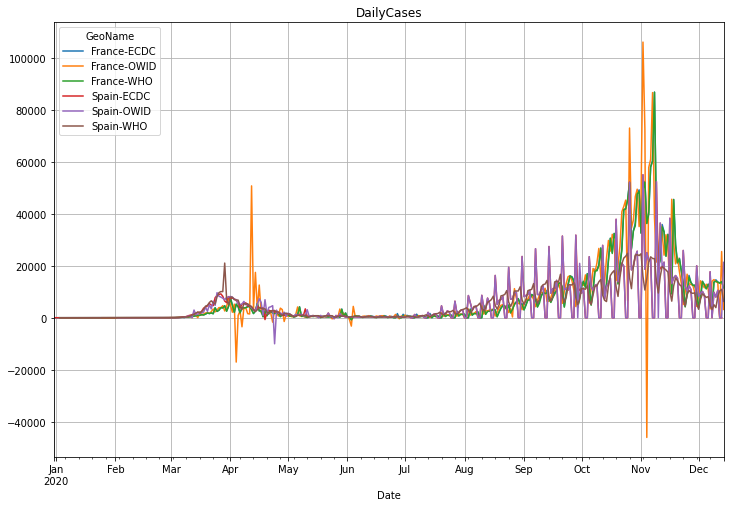

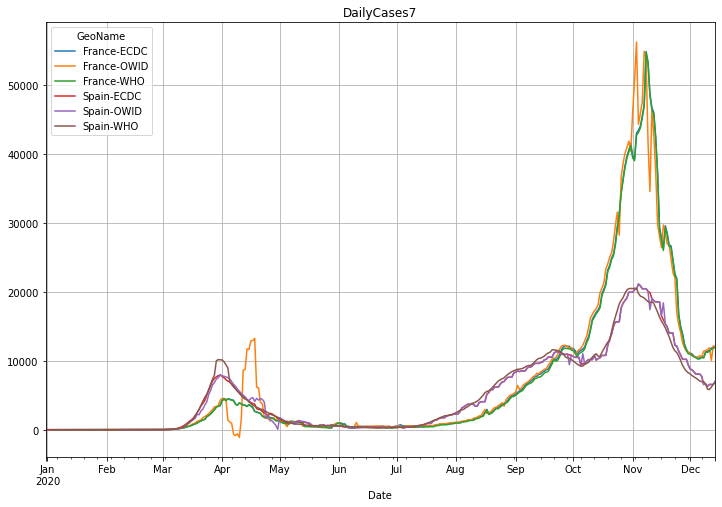

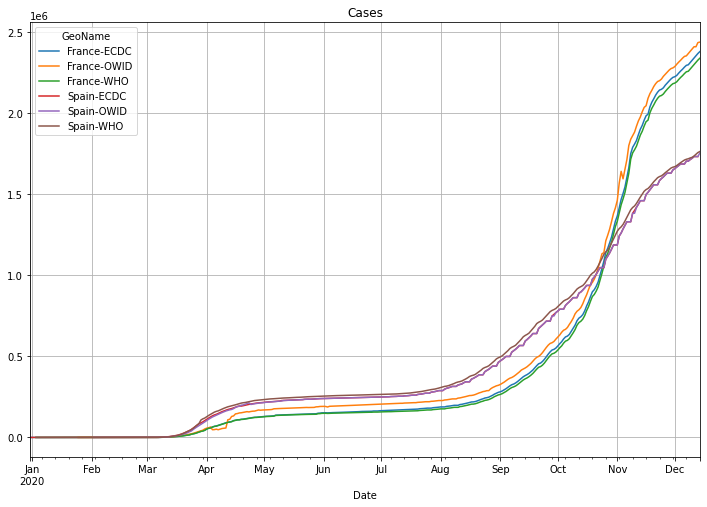

In [4]:
# the list of comma separated geoIDs
countryList = 'FR, ES'

# create the dataframe
df = create_combined_dataframe(objList, countryList)
# and generate the plots
plot_the_data(df)

 
 Let's take a closer look to the last 49 days to see more of the difference in the data. This  
 time we will see a slightly difference in the ECDC and WHO data and the up and down curve  
 using the OWID data even in the accumulated data:
    

/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: invalid value encountered in double_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: invalid value encountered in long_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: divide by zero encountered in long_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])


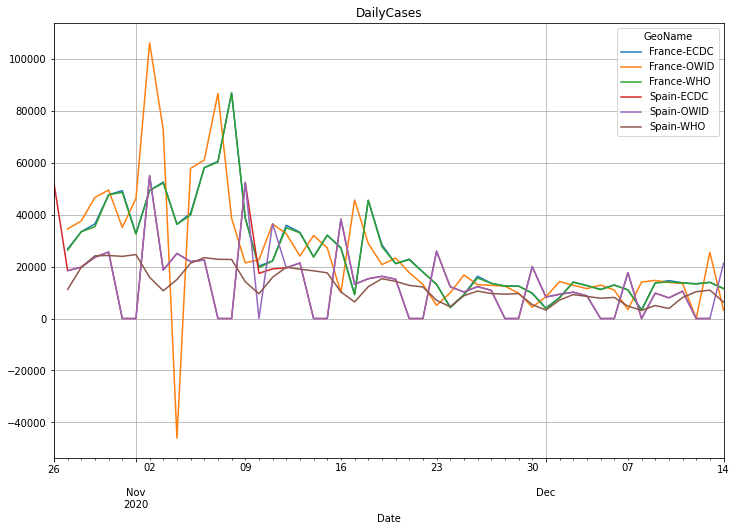

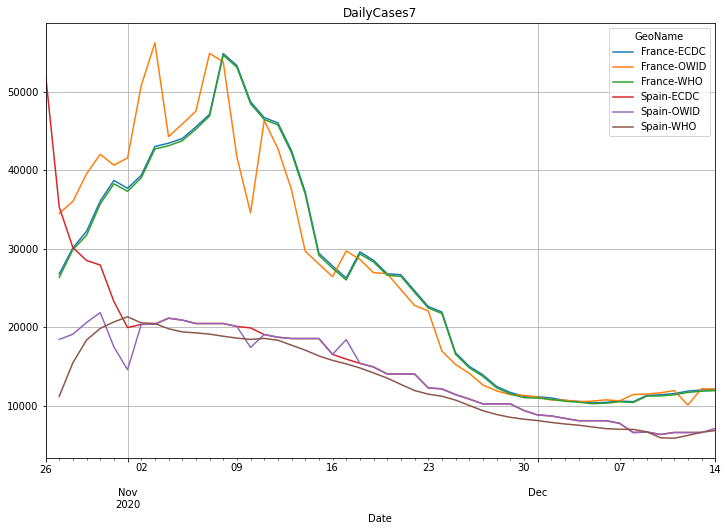

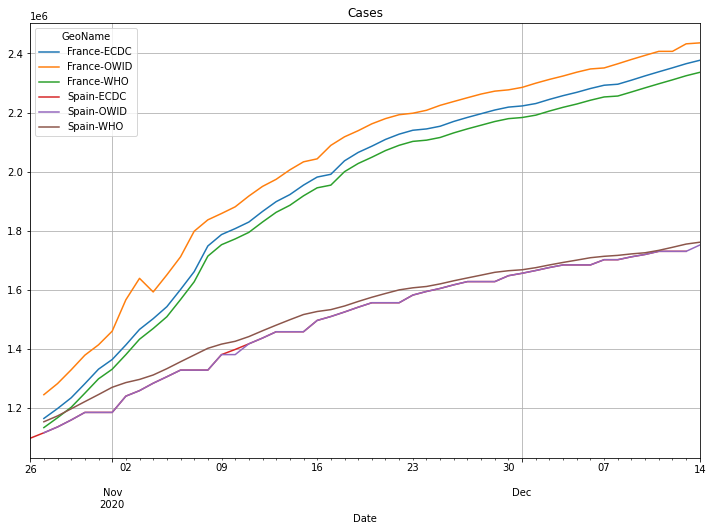

In [5]:
# create the dataframe
df = create_combined_dataframe(objList, countryList, lastNdays=49)
# and generate the plots
plot_the_data(df)


# Germany and Italy

Let's change the countries to Italy and Germany to see a strange behavior. While the OVID data  
for Germany is again very noisy with ECDC and WHO being more or less identically, the data for  
Italy is more or less the same for all three sources.


/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: invalid value encountered in double_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: invalid value encountered in long_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: divide by zero encountered in long_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])


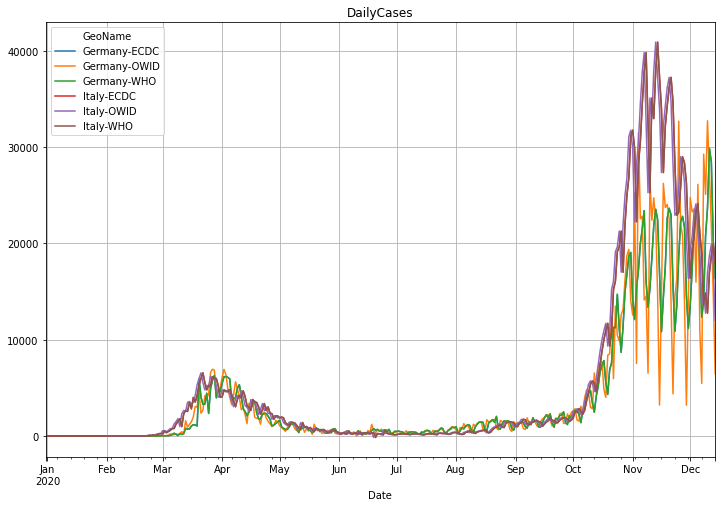

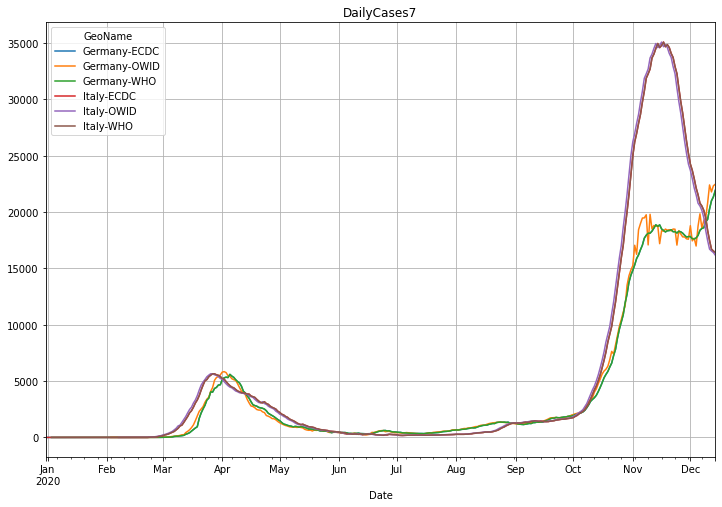

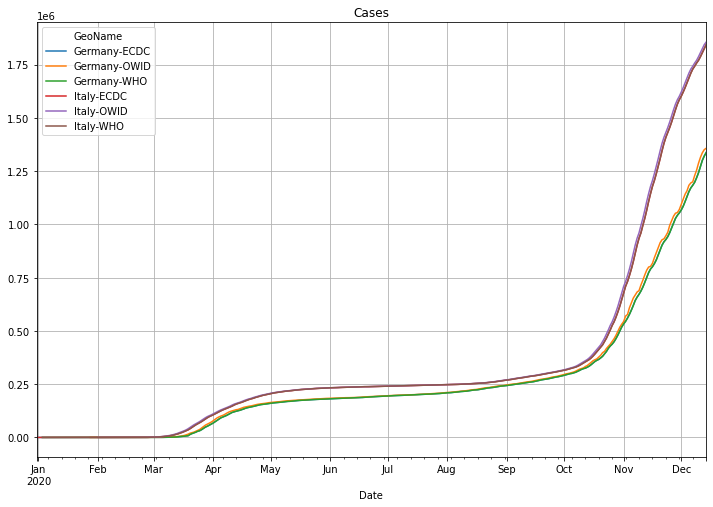

In [6]:
# the list of comma separated geoIDs
countryList = 'DE, IT'

# create the dataframe
df = create_combined_dataframe(objList, countryList)
# and generate the plots
plot_the_data(df)


## Unites States, Brasil and the United Kingdom

For the US, Brasil and United Kingdom data we will notice that the United Kingdom data is obviously the  
same for all data sources and that the OWID data is again noisy for especially Brasil.  


/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: invalid value encountered in double_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: invalid value encountered in long_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: divide by zero encountered in long_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])


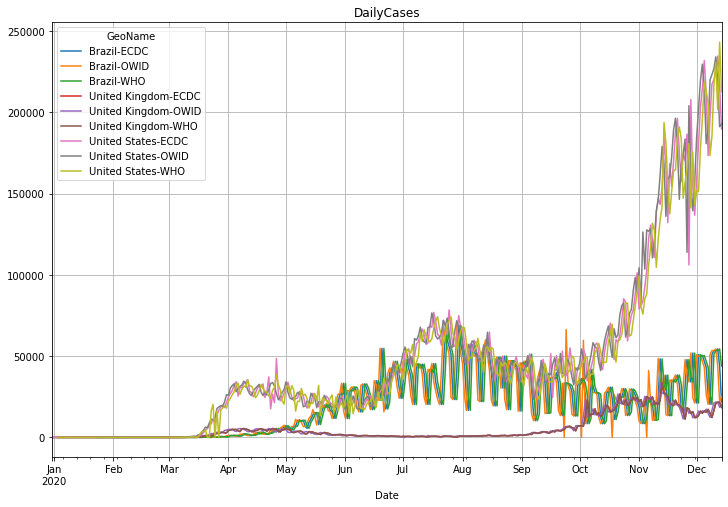

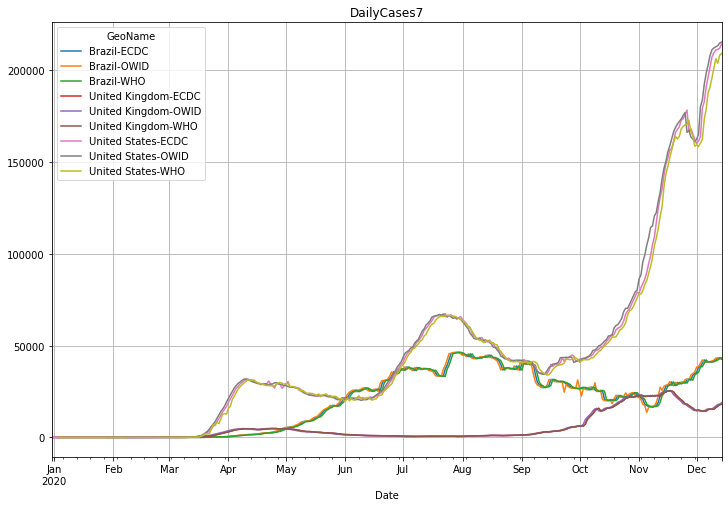

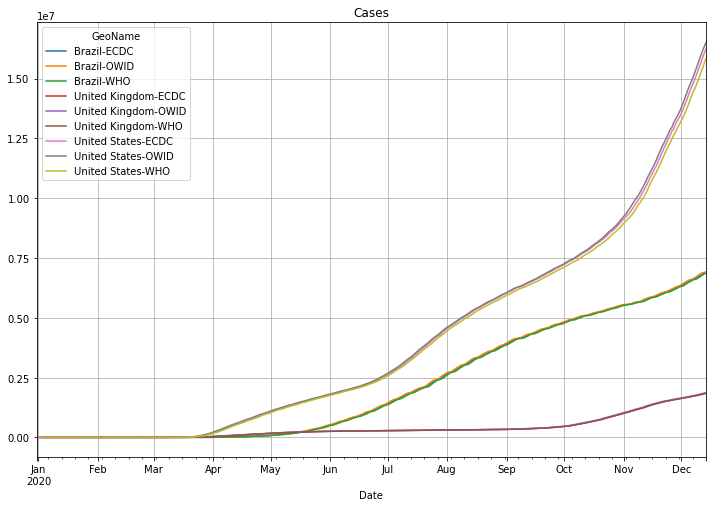

In [7]:
# the list of comma separated geoIDs
countryList = 'US, BR, GB'

# create the dataframe
df = create_combined_dataframe(objList, countryList)
# and generate the plots
plot_the_data(df)


## Japan, Korea and China

For Japan we notice a bigger noise in the ECDC data. For Korea the data is more or less the same and  
the ECDC and WHO data is the same, but slightly shifted by some days. In contrast to the other two  
sources the WHO does not report recent numbers for China.


/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: invalid value encountered in double_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: invalid value encountered in long_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])
/Users/cmbt/Documents/GitHub/Covid-19-analysis/src/CovidCases.py:119: RuntimeWarning: divide by zero encountered in long_scalars
  quotient.append(value / dfSingleCountry['Cases'][index - 1])


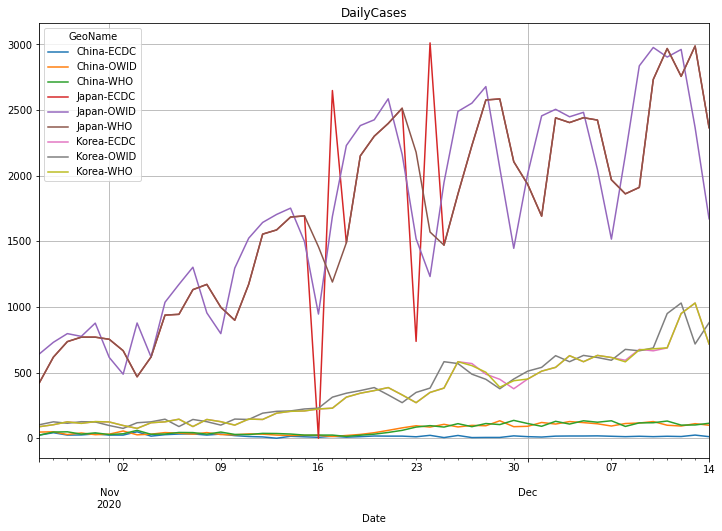

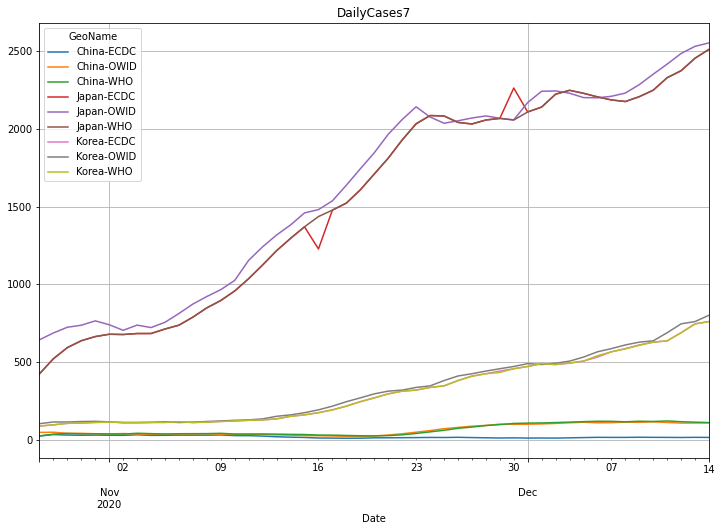

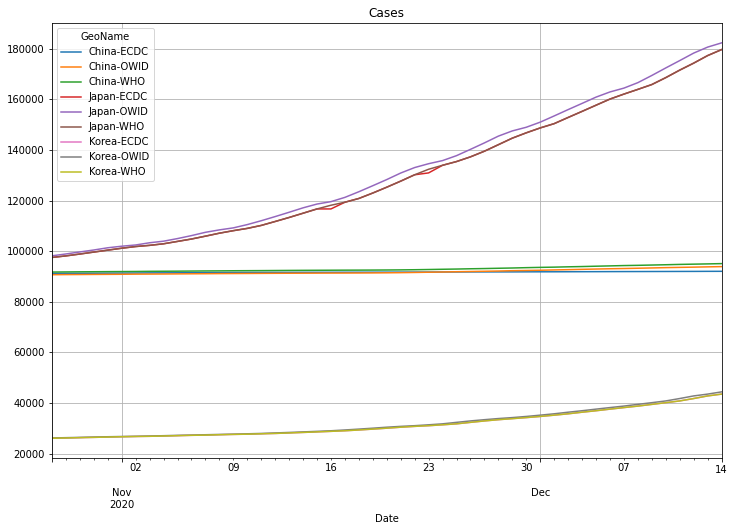

In [8]:
# the list of comma separated geoIDs
countryList = 'JP, CN, KR'

# create the dataframe
df = create_combined_dataframe(objList, countryList, lastNdays = 49)
# and generate the plots
plot_the_data(df)


## Conclusion

If you are just looking to one country you can use any of the data sources. But the quality of the sources  
is very different. As soon as you want to compare different countries or do some calculations on the data  
such as calculating the incidence, doubling time or reproduction number R you need *clean* data instead of  
noisy data. Therefore you should avoid using the OWID respectively their source JHU data. The JHU GitHub site  
(https://github.com/CSSEGISandData/COVID-19) refers to many data sources and claims to make use of ECDC,  
WHO and other *aggregated data sources*, but in fact it seems that the long list of the *Non-US data sources*  
are the main source for the published data. For Germany they list the *Berliner Morgenpost* newspaper as a  
source (https://interaktiv.morgenpost.de/corona-virus-karte-infektionen-deutschland-weltweit/) but that  
website refers back to JHU. There was an interesting article about this available here (German language):  
https://www.tagesschau.de/inland/johns-hopkins-uni-corona-zahlen-101.html  
The article tracked the source of the data and ended up in a company named *Risklayer* in Karlsruhe, Germany.  
This company uses 40 freelancer that work on a list of local data sources to compile numbers for Germany.  
They claim to be faster as the official source, the *Robert Koch Institut* (RKI). That might be true, but the  
RKI numbers do not show such a huge *weekend* effect and have much smoother data. They also publish the data  
always on the same time every day while the JHU data is constantly updated during the day. Taking the data  
at a specific time is essential for calculations. Consider analyzing the temperature and one is using the  
temperature from 6:00 and another from 12:00.   
